In [1]:
import numpy as np
from tqdm import tqdm

from src.visualization import plot_result
from src.algorithms import LocalSearchTSP, CandidateSteepestLocalSearchTSP

In [2]:
def pretty_print(algorithm, values):
    min_time, max_time, avg_time, minv, maxv, avgv = values
    print(f'Algorithm: {algorithm}:')
    print(f'    objective: {avgv}({int(minv)} - {int(maxv)})')
    print(f'    times: {avg_time}({min_time} - {max_time})')
    print('========================================================')

In [3]:
def experiments(node_path):
    nodes_instance = np.genfromtxt(node_path, dtype=int, delimiter=';')
    algorithms = {'steepest_local_search_edges_random': LocalSearchTSP('steepest', node_path, 'edges', 'random'),
    'steepest_local_search_edges_random_candidate': CandidateSteepestLocalSearchTSP(node_path, k=10)}
    results = {}
    for key, algorithm in tqdm(algorithms.items()):
        result = algorithm.run_experiment()
        results[key] = result

    for key, result in results.items():
        values = result[:-2]
        pretty_print(key, values)

    for key, result in results.items():
        minv, path = result[3], result[-2]
        plot_result(nodes_instance, path, minv)
        print('===============================================================')

# Instance C

100%|██████████| 2/2 [10:30<00:00, 315.09s/it]

Algorithm: steepest_local_search_edges_random:
    objective: 51480.48(48662 - 55551)
    times: 2.6287617456912993(2.204841136932373 - 3.028205156326294)
Algorithm: steepest_local_search_edges_random_candidate:
    objective: 52579.805(50082 - 55572)
    times: 0.5806188571453095(0.5035097599029541 - 0.6715719699859619)


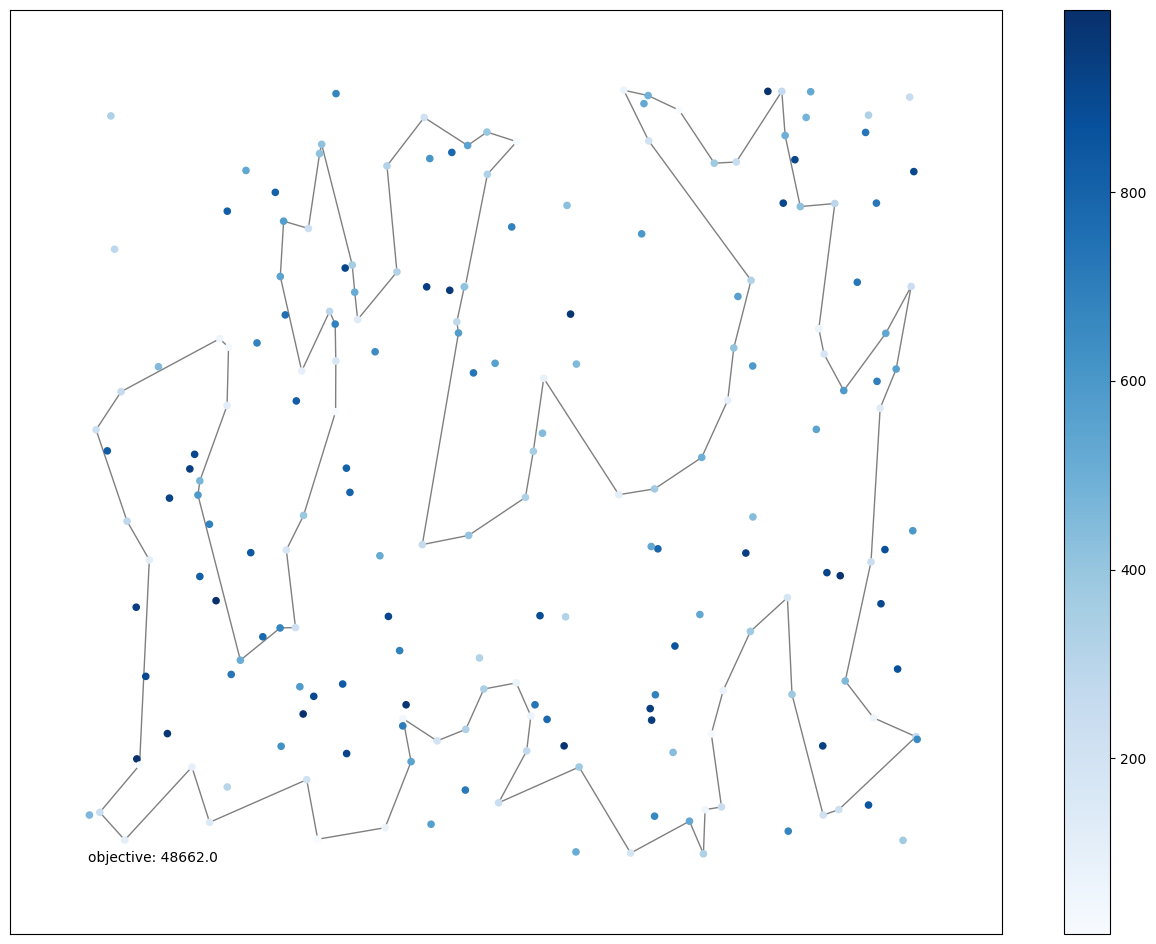

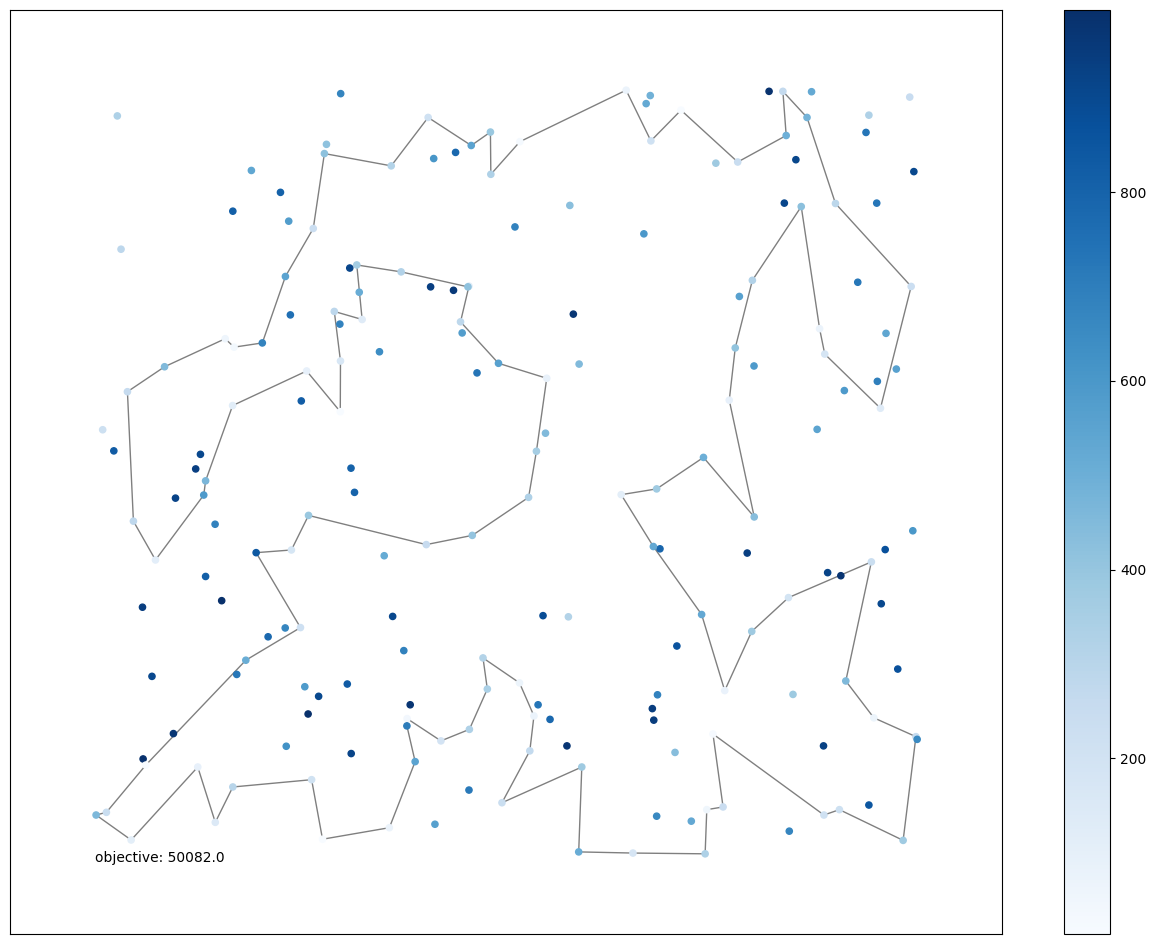

In [4]:
node_path_C = '../data/TSPC.csv'
experiments(node_path_C)

# Instance D

100%|██████████| 2/2 [10:28<00:00, 314.01s/it]

Algorithm: steepest_local_search_edges_random:
    objective: 48346.97(45331 - 52276)
    times: 2.5580335903167724(2.161766767501831 - 2.9790258407592773)
Algorithm: steepest_local_search_edges_random_candidate:
    objective: 49278.29(45503 - 53255)
    times: 0.5950636422634125(0.5006856918334961 - 0.7044134140014648)


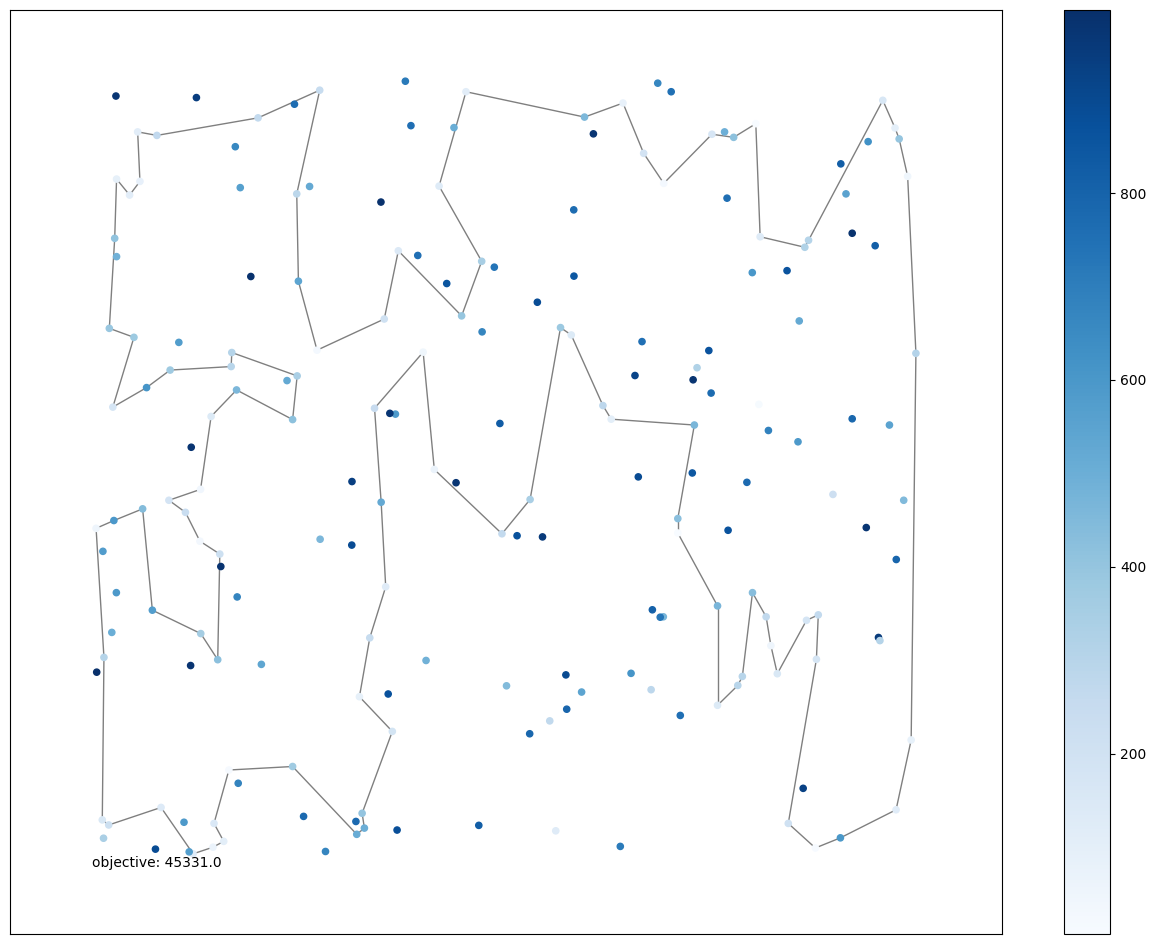

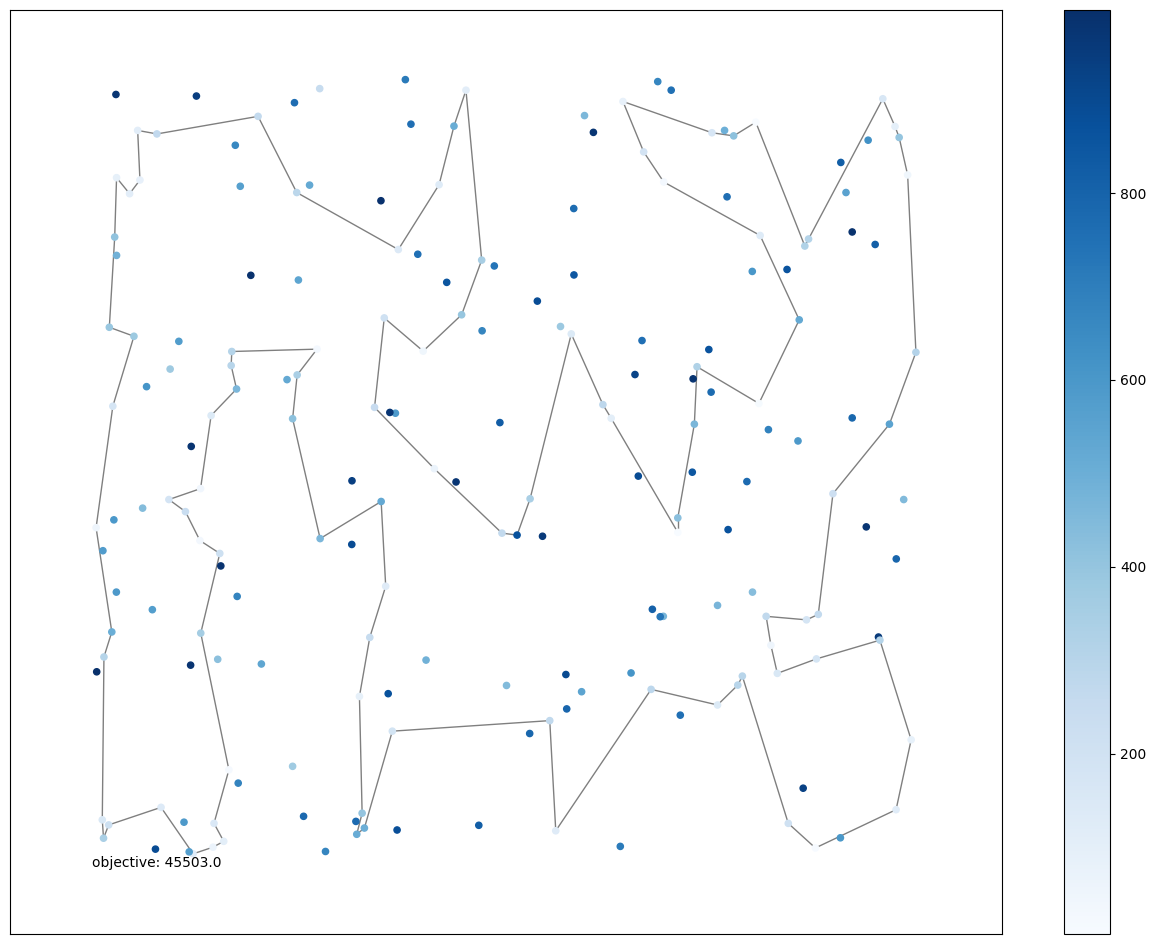

In [5]:
node_path_D = '../data/TSPD.csv'
experiments(node_path_D)